<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [19]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [21]:
data = pd.read_csv('./train.csv')

In [22]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Оказалось что TotalSpent имеет формат string. Переведем к численному формату, а также заменим nan на 0

In [23]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')
data['TotalSpent'] = data['TotalSpent'].replace(np.nan, 0)
data['TotalSpent'].isna().sum()

0

In [24]:
X = data[feature_cols]
y = data[target_col]

nan_table = data.isna().sum()
print(nan_table) # Таблица с nan в каждой колонке
print("\nОбнаружено", nan_table.sum(), "nan")

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Обнаружено 0 nan


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

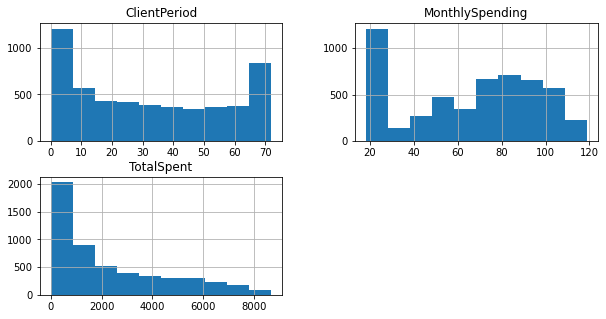

In [25]:
data.hist(column=num_cols, figsize=(10,5))
None

In [26]:
print(data.nunique())

ClientPeriod                  73
MonthlySpending             1468
TotalSpent                  4978
Sex                            2
IsSeniorCitizen                2
HasPartner                     2
HasChild                       2
HasPhoneService                2
HasMultiplePhoneNumbers        3
HasInternetService             3
HasOnlineSecurityService       3
HasOnlineBackup                3
HasDeviceProtection            3
HasTechSupportAccess           3
HasOnlineTV                    3
HasMovieSubscription           3
HasContractPhone               3
IsBillingPaperless             2
PaymentMethod                  4
Churn                          2
dtype: int64


Распределение по классам в виде круговых диаграмм:

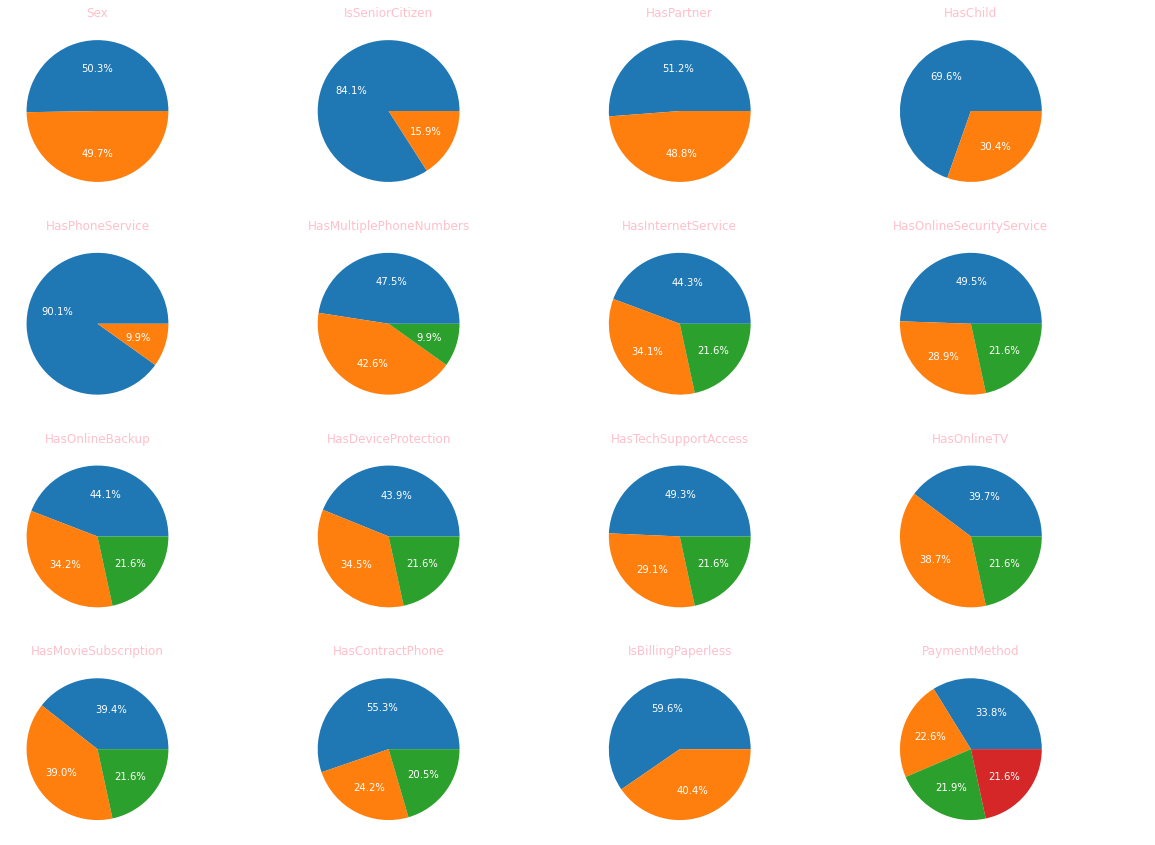

In [27]:
f, axes= plt.subplots(4, 4, figsize=(20,15))

for i in range(4):
    for j in range(4):
        axes[i,j].pie(
            data[cat_cols[i*4+j]].value_counts(), 
            labels=[data[cat_cols[i*4+j]].value_counts().index[k] for k in range(len(data[cat_cols[i*4+j]].value_counts()))],
            autopct='%1.1f%%',
            radius= 1,
            textprops={'color':"w"}
        )
        axes[i,j].set_title(cat_cols[i*4+j], fontdict={'color':"Pink"})

plt.show()

Распределение по классам в виде bar диаграмм:

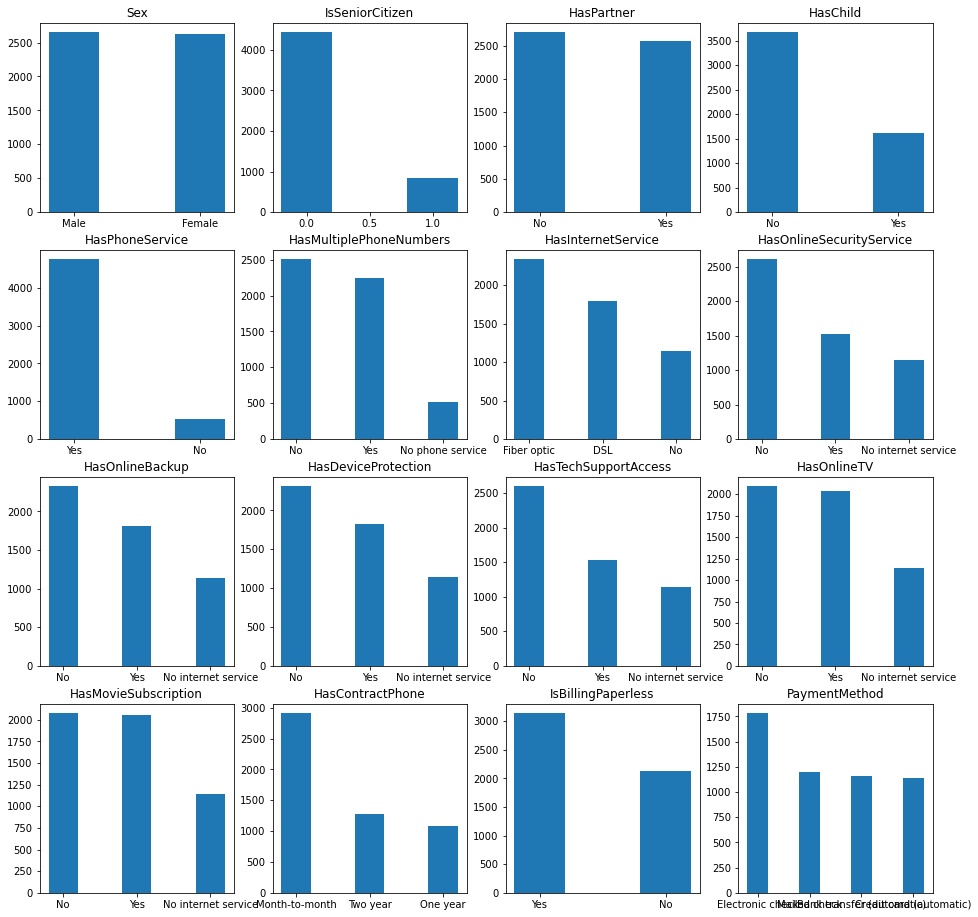

In [28]:
f, axes= plt.subplots(4, 4, figsize=(16,16))

for i in range(4):
    for j in range(4):
        axes[i,j].bar(
            height=data[cat_cols[i*4+j]].value_counts(), 
            x=[data[cat_cols[i*4+j]].value_counts().index[k] for k in range(len(data[cat_cols[i*4+j]].value_counts()))],
            width=0.4
        )
        axes[i,j].set_title(cat_cols[i*4+j], fontdict={'color':"Black"})

plt.show()

Распределение целевой переменной:

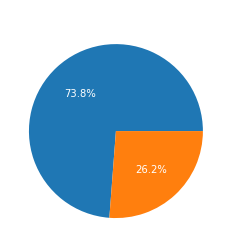

In [29]:
plt.pie(
    data[target_col].value_counts(),
    labels=[data[target_col].value_counts().index[k] for k in range(len(data[target_col].value_counts()))],
    autopct='%1.1f%%',textprops={'color':"w"},
    )
plt.title("Целевая переменная "+target_col,fontdict={'color':"White"})
None

Классы являются несбалансированными

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [30]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

Обработка данных:

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data[feature_cols], data[target_col], test_size=0.3, random_state=0)

encoder = OneHotEncoder(sparse=False)
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[cat_cols]))
X_test_encoded = pd.DataFrame(encoder.transform(X_test[cat_cols]))

X_train_encoded.index = X_train.index
X_test_encoded.index = X_test.index

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_train = pd.concat([X_train[num_cols], X_train_encoded], axis=1)
X_test = pd.concat([X_test[num_cols], X_test_encoded], axis=1)

In [32]:
pd.concat([X_train, y_train],axis=1).sort_index()#Так выглядит таблица X_train вместе с y_train

,ClientPeriod,MonthlySpending,TotalSpent,0,1,2,3,4,5,6,...,34,35,36,37,38,39,40,41,42,Churn
0,0.931706,-1.510356,-0.552401,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
2,-1.277025,0.364041,-0.973432,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
3,-0.009050,0.477036,0.131406,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
5,-0.295367,-1.500386,-0.796550,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0
6,-0.213562,0.837625,0.066465,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5274,-1.236123,0.159652,-0.943021,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
5276,1.627047,1.105159,2.100852,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0
5277,-1.195221,-1.148106,-0.970663,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
5279,-1.277025,-0.328888,-0.982668,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0


In [33]:
corr_table_style = pd.concat([X_train, y_train],axis=1).sort_index().corr().style.background_gradient(cmap='coolwarm').set_precision(2)
corr_table = pd.concat([X_train, y_train],axis=1).sort_index().corr()
display(corr_table_style)

C:\Users\Nigel\AppData\Local\Temp/ipykernel_8620/3549769019.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_table_style = pd.concat([X_train, y_train],axis=1).sort_index().corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,ClientPeriod,MonthlySpending,TotalSpent,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,Churn
ClientPeriod,1.00,0.25,0.83,-0.00,0.00,-0.02,0.02,-0.36,0.36,-0.15,0.15,-0.02,0.02,-0.31,-0.02,0.33,0.01,0.02,-0.03,-0.27,-0.03,0.33,-0.32,-0.03,0.36,-0.32,-0.03,0.36,-0.27,-0.03,0.33,-0.24,-0.03,0.27,-0.27,-0.03,0.30,-0.65,0.20,0.57,-0.00,0.00,0.24,0.23,-0.22,-0.21,-0.35
MonthlySpending,0.25,1.00,0.65,0.01,-0.01,-0.21,0.21,-0.09,0.09,0.14,-0.14,-0.25,0.25,-0.33,-0.25,0.48,-0.16,0.79,-0.76,0.36,-0.76,0.29,0.21,-0.76,0.45,0.17,-0.76,0.48,0.32,-0.76,0.33,0.01,-0.76,0.63,0.02,-0.76,0.63,0.07,-0.00,-0.07,-0.36,0.36,0.04,0.05,0.26,-0.38,0.20
TotalSpent,0.83,0.65,1.00,0.00,-0.00,-0.10,0.10,-0.31,0.31,-0.04,0.04,-0.12,0.12,-0.38,-0.12,0.45,-0.05,0.36,-0.37,-0.07,-0.37,0.42,-0.18,-0.37,0.51,-0.19,-0.37,0.52,-0.09,-0.37,0.44,-0.19,-0.37,0.51,-0.21,-0.37,0.53,-0.45,0.16,0.37,-0.16,0.16,0.19,0.19,-0.08,-0.28,-0.20
0,-0.00,0.01,0.00,1.00,-1.00,0.02,-0.02,0.00,-0.00,0.01,-0.01,0.01,-0.01,0.00,0.01,-0.01,0.00,0.00,-0.00,-0.00,-0.00,0.01,-0.01,-0.00,0.01,-0.00,-0.00,0.01,-0.01,-0.00,0.02,-0.01,-0.00,0.01,-0.01,-0.00,0.02,-0.01,-0.01,0.02,-0.01,0.01,0.02,0.00,-0.01,-0.01,0.01
1,0.00,-0.01,-0.00,-1.00,1.00,-0.02,0.02,-0.00,0.00,-0.01,0.01,-0.01,0.01,-0.00,-0.01,0.01,-0.00,-0.00,0.00,0.00,0.00,-0.01,0.01,0.00,-0.01,0.00,0.00,-0.01,0.01,0.00,-0.02,0.01,0.00,-0.01,0.01,0.00,-0.02,0.01,0.01,-0.02,0.01,-0.01,-0.02,-0.00,0.01,0.01,-0.01
2,-0.02,-0.21,-0.10,0.02,-0.02,1.00,-1.00,0.01,-0.01,-0.23,0.23,-0.01,0.01,0.14,-0.01,-0.13,0.09,-0.23,0.18,-0.18,0.18,0.04,-0.08,0.18,-0.07,-0.10,0.18,-0.05,-0.20,0.18,0.06,-0.05,0.18,-0.10,-0.03,0.18,-0.13,-0.14,0.06,0.10,0.16,-0.16,0.02,0.02,-0.18,0.16,-0.17
3,0.02,0.21,0.10,-0.02,0.02,-1.00,1.00,-0.01,0.01,0.23,-0.23,0.01,-0.01,-0.14,0.01,0.13,-0.09,0.23,-0.18,0.18,-0.18,-0.04,0.08,-0.18,0.07,0.10,-0.18,0.05,0.20,-0.18,-0.06,0.05,-0.18,0.10,0.03,-0.18,0.13,0.14,-0.06,-0.10,-0.16,0.16,-0.02,-0.02,0.18,-0.16,0.17
4,-0.36,-0.09,-0.31,0.00,-0.00,0.01,-0.01,1.00,-1.00,0.45,-0.45,0.01,-0.01,0.11,0.01,-0.12,0.01,-0.00,-0.01,0.15,-0.01,-0.15,0.13,-0.01,-0.13,0.15,-0.01,-0.15,0.12,-0.01,-0.13,0.13,-0.01,-0.12,0.14,-0.01,-0.13,0.28,-0.08,-0.26,-0.01,0.01,-0.11,-0.08,0.09,0.08,0.15
5,0.36,0.09,0.31,-0.00,0.00,-0.01,0.01,-1.00,1.00,-0.45,0.45,-0.01,0.01,-0.11,-0.01,0.12,-0.01,0.00,0.01,-0.15,0.01,0.15,-0.13,0.01,0.13,-0.15,0.01,0.15,-0.12,0.01,0.13,-0.13,0.01,0.12,-0.14,0.01,0.13,-0.28,0.08,0.26,0.01,-0.01,0.11,0.08,-0.09,-0.08,-0.15
6,-0.15,0.14,-0.04,0.01,-0.01,-0.23,0.23,0.45,-0.45,1.00,-1.00,-0.01,0.01,-0.03,-0.01,0.04,-0.04,0.18,-0.17,0.22,-0.17,-0.09,0.15,-0.17,-0.01,0.12,-0.17,0.01,0.18,-0.17,-0.05,0.11,-0.17,0.03,0.10,-0.17,0.04,0.24,-0.07,-0.21,-0.11,0.11,-0.06,-0.05,0.16,-0.08,0.17


In [34]:
c_arr=[100, 10, 1, 0.1, 0.01, 0.001]

for c_number in c_arr:
    clf = LogisticRegression(C=c_number, solver='liblinear').fit(X_train, y_train)
    clf.predict(X_test)
    clf.predict_proba(X_test)
    print(c_number, roc_auc_score(y_test,clf.predict(X_test)))

100 0.709638436509757
10 0.7100589579563508
1 0.709638436509757
0.1 0.7033242432737807
0.01 0.6940600283745784
0.001 0.6060744110575903


In [35]:
clfcv = LogisticRegressionCV(scoring='roc_auc', random_state=0,solver='liblinear').fit(X_train, y_train)
clfcv.predict(X_test)
clfcv.predict_proba(X_test)
clfcv.score(X_test, y_test)

svc = roc_auc_score(y_test.sort_index(), clfcv.predict(X_test.sort_index()))

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [36]:
print("ROC-AUC: " + str(svc))
print("\nПараметры:")
clfcv.get_params()

ROC-AUC: 0.7100589579563508

Параметры:


{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'refit': True,
 'scoring': 'roc_auc',
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0}

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [39]:
import catboost as ctb

X_train, X_test, y_train, y_test = train_test_split(data[feature_cols], data[target_col], test_size=0.3, random_state=0)

catb = ctb.CatBoostClassifier(num_trees=100, learning_rate=0.4, cat_features=cat_cols).fit(X_train, y_train, verbose=False)
catb.predict(X_test)
catb.score(X_test,y_test)

roc_auc_score(y_test, catb.predict(X_test))

0.7109021246952282

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [337]:
best_model = catb

In [338]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')
X_test['TotalSpent'] = pd.to_numeric(X_test['TotalSpent'], errors='coerce').replace(np.nan, 0)
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

In [339]:
submission['Churn'] = best_model.predict(X_test)
submission.to_csv('./my_submission.csv', index=False)

Catb roc-auc = 0.7109021246952282

LogisticRegressionCV roc-auc = 0.7100589579563508

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.